<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Amplitude/Duration" data-toc-modified-id="Amplitude/Duration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Amplitude/Duration</a></span></li><li><span><a href="#SLOPE" data-toc-modified-id="SLOPE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SLOPE</a></span></li><li><span><a href="#Running-and-filtered-pupil" data-toc-modified-id="Running-and-filtered-pupil-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Running and filtered pupil</a></span></li><li><span><a href="#Pearsons-Correlation" data-toc-modified-id="Pearsons-Correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pearsons Correlation</a></span></li><li><span><a href="#pupil-and-avg-CA" data-toc-modified-id="pupil-and-avg-CA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>pupil and avg CA</a></span></li></ul></div>

In [1]:
# Setup specific to iPython notebooks
%matplotlib inline

# Standard Python library imports
import sys
import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime


# Setup lab-specific imports
import lab
from lab import ExperimentSet
import lab.analysis.imaging_analysis as ia
import lab.figures.analysisFigures as af
import lab.plotting.analysis_plotting as ap
import lab.plotting as plotting
from lab.classes.dbclasses import dbExperimentSet, dbMouse, dbExperiment
from lab.misc import savefigs, summarySheet
from matplotlib.backends.backend_pdf import PdfPages

import lab.figures.place_cell_figures as pcf
from lab.classes import pcExperimentGroup

# Get ExperimentSet
expts = ExperimentSet('mdavis.sql')


/home/matt/anaconda/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/matt/code/analysis/lab/misc/lfp_helpers.py:16: UserWarning: rhd package not found, lab.misc.lfp_helpers.py will not work
  warnings.warn("rhd package not found, lab.misc.lfp_helpers.py will not work")


In [3]:
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/mouse= dbMouse("mjd511")
label="mjd511"
expt_list=[]
for expt in mouse.findall('experiment'):
    if expt.get('trial_id') == 12805:
        expt_list.append(expt)
pc_kwargs = {'nPositionBins': 100,'channel': 'Ch2','imaging_label': 'soma','demixed': False}        
expt_grp = pcExperimentGroup(expt_list, label=label, **pc_kwargs)

# Amplitude/Duration

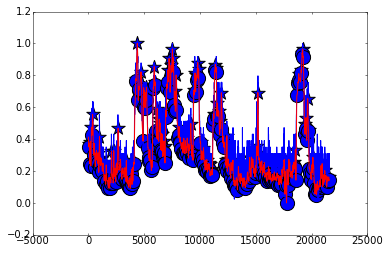

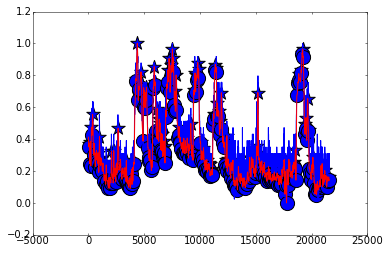

In [125]:
from lab.analysis import pupil_analysis as pa
reload(pa)
d,d_frames,d_frames_stat,dp=pa.pupil_phase_recruitment(expt_grp,dtype='trans_in_phase',phase='dilation',activity_interval='stationary')
r,r_frames,r_frames_stat,rp=pa.pupil_phase_recruitment(expt_grp,dtype='trans_in_phase',phase='constriction',activity_interval='stationary')


In [126]:
#duration_list=np.empty([0])
d_duration_list=[]
for index, row in d.iterrows():
    try:
        d_duration_list.extend(np.squeeze(np.asarray(row['durations'])))
    except TypeError:
        continue
        
#[item for sublist in duration_list for item in sublist]

In [127]:
r_duration_list=[]
for index, row in r.iterrows():
    try:
        r_duration_list.extend(np.squeeze(np.asarray(row['durations'])))
    except TypeError:
        continue

(array([  0.,   8.,  67.,  63.,  32.,  21.,  22.,  13.,  11.,   6.,  14.,
         10.,   3.,   9.,   7.,   4.,   3.,   0.,   5.,   5.]),
 array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ]),
 <a list of 20 Patch objects>)

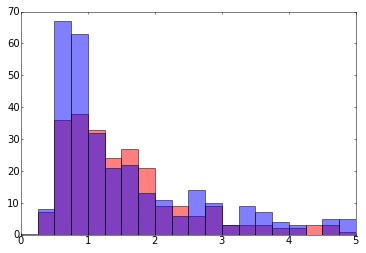

In [128]:
plt.hist(d_duration_list,20,range=(0,5),alpha=0.5,color='r')
plt.hist(r_duration_list,20,range=(0,5),alpha=0.5,color='b')

In [129]:
print np.mean(d_duration_list)
print np.mean(r_duration_list)

2.18276913858
2.04890813456


# SLOPE

In [306]:
#TEST
reload(pa)

d,d_frames,d_frames_stat,pp=pa.pupil_phase_recruitment(expt_grp,dtype='trans_in_phase',phase='dilation',activity_interval=None)


ValueError: too many values to unpack

(array([  1.,  26.,  40.,  37.,  22.,  13.,  12.,  10.,   8.,   2.,   4.,
          2.]),
 array([ 0.        ,  0.00833333,  0.01666667,  0.025     ,  0.03333333,
         0.04166667,  0.05      ,  0.05833333,  0.06666667,  0.075     ,
         0.08333333,  0.09166667,  0.1       ]),
 <a list of 12 Patch objects>)

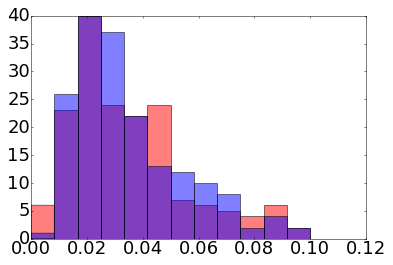

In [81]:
#slope
plt.hist(pp['d_slope'],12,range=(0,.1),alpha=0.5,color='r')
plt.hist(pp['c_slope'],12,range=(0,.1),alpha=0.5,color='b')


In [67]:
len(pp['c_slope'])
#len(pp['d_slope'])

178

In [135]:
reload(pa)
d,d_frames,d_frames_stat,pd=pa.pupil_phase_recruitment(expt_grp,dtype='trans_in_phase',phase='dilation',activity_interval='stationary')
r,r_frames,r_frames_stat,pr=pa.pupil_phase_recruitment(expt_grp,dtype='trans_in_phase',phase='constriction',activity_interval='stationary')


7.91176470588
8.65789473684


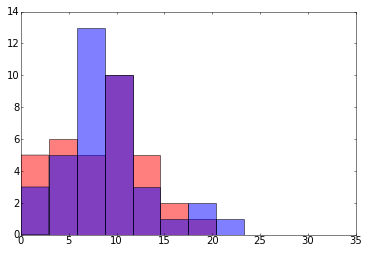

In [131]:
plt.hist(d.value,12,range=(0,35),alpha=0.5,color='r')
plt.hist(r.value,12,range=(0,35),alpha=0.5,color='b')

print np.mean(d.value)
print np.mean(r.value)

# Running and filtered pupil

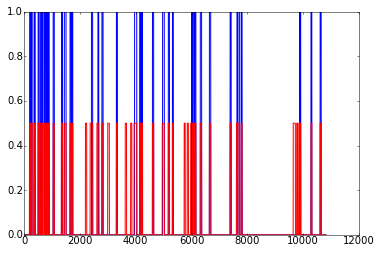

In [132]:
# see running/stationary
plt.plot(r_frames_stat)
plt.plot(r_frames*.5,'r-')



7.91176470588
8.65789473684


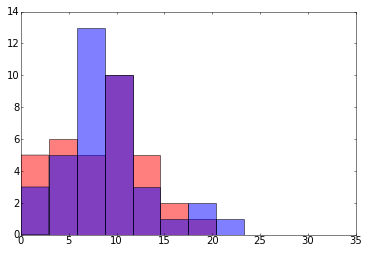

In [134]:
plt.hist(d.value,12,range=(0,35),alpha=0.5,color='r')
plt.hist(r.value,12,range=(0,35),alpha=0.5,color='b')


print np.mean(d.value)
print np.mean(r.value)

In [138]:
from lab.analysis import pupil_analysis as pa
reload(pa)

#d,d_frames,d_frames_stat=pa.pupil_phase_recruitment(expt_grp,dtype='phase_in_trans',phase='dilation')
#r,r_frames,r_frames_stat=pa.pupil_phase_recruitment(expt_grp,dtype='phase_in_trans',phase='constriction')

#d,d_frames,d_frames_stat=pa.pupil_phase_recruitment(expt_grp,dtype='phase_in_trans',phase='dilation',activity_interval='running')
#r,r_frames,r_frames_stat=pa.pupil_phase_recruitment(expt_grp,dtype='phase_in_trans',phase='constriction',activity_interval='running')

d,d_frames,d_frames_stat,pd=pa.pupil_phase_recruitment(expt_grp,dtype='phase_in_trans',phase='dilation',activity_interval='stationary')
r,r_frames,r_frames_stat,pr=pa.pupil_phase_recruitment(expt_grp,dtype='phase_in_trans',phase='constriction',activity_interval='stationary')


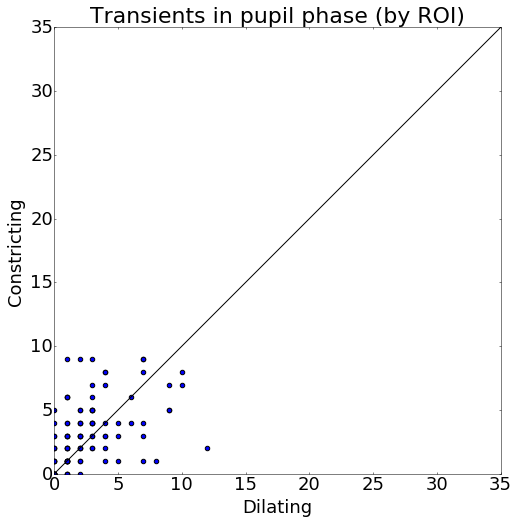

In [139]:
xlim=35
ylim=35
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(d.value,r.value)
plt.ylim(0, xlim)
plt.xlim(0, ylim)
ax.set_xlabel('Dilating')
ax.set_ylabel('Constricting')
ax.set_title('Transients in pupil phase (by ROI)',size=22)


plt.rcParams.update({'font.size': 18})


plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, xlim],[0,ylim], "k-")

    


In [146]:
# place cell stuff
roi=d.roi[0]
roi_filter=None
place_cells=[]
pc_rois=[]

for expt in expt_grp:
    place_cells.extend(expt_grp.data(
        roi_filter=expt_grp.pcs_filter(roi_filter=roi_filter))[expt])
    
    pc_rois.extend(expt_grp.rois(
        roi_filter=expt_grp.pcs_filter(roi_filter=roi_filter))[expt])


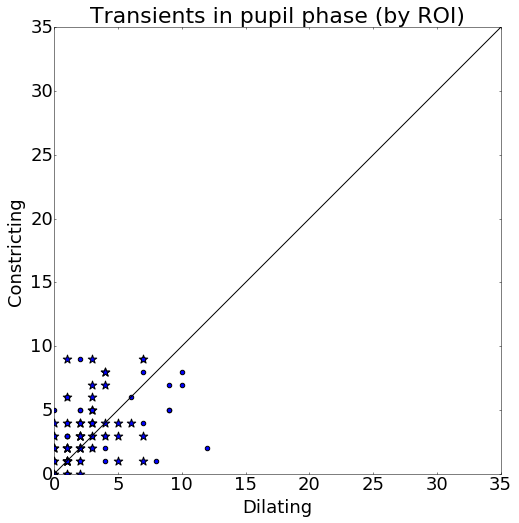

In [147]:
xlim=35
ylim=35
fig, ax = plt.subplots(figsize=(8,8))

for i,roi in enumerate(d.roi):

    if roi in pc_rois:
        ax.scatter(d.value[i],r.value[i],s=80,marker='*')
    else:
        ax.scatter(d.value[i],r.value[i],s=20,marker='o')
plt.ylim(0, xlim)
plt.xlim(0, ylim)
ax.set_xlabel('Dilating')
ax.set_ylabel('Constricting')
ax.set_title('Transients in pupil phase (by ROI)',size=22)
plt.rcParams.update({'font.size': 18})
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, xlim],[0,ylim], "k-")


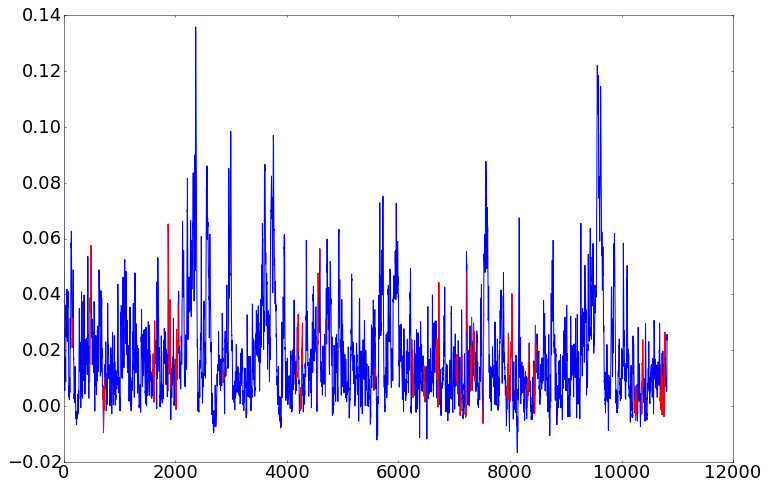

In [143]:
from copy import copy
fig, ax = plt.subplots(figsize=(12,8))
mean_df=np.nanmean(expt_grp[0].imagingData(dFOverF='from_file'),axis=0)
d_df=copy(mean_df)
r_df=copy(mean_df)

ax.plot(mean_df)
d_df[~d_frames_stat]=np.nan
r_df[~r_frames_stat]=np.nan
ax.plot(d_df,'r-')

(array([  5.,   3.,   6.,   6.,   4.,   3.,  21.,  12.,  24.,  11.,  17.,
          7.,   2.,   5.,   3.,   3.,   4.,   2.,   3.,   2.]),
 array([ 0.06666667,  0.22      ,  0.37333333,  0.52666667,  0.68      ,
         0.83333333,  0.98666667,  1.14      ,  1.29333333,  1.44666667,
         1.6       ,  1.75333333,  1.90666667,  2.06      ,  2.21333333,
         2.36666667,  2.52      ,  2.67333333,  2.82666667,  2.98      ,
         3.13333333]),
 <a list of 20 Patch objects>)

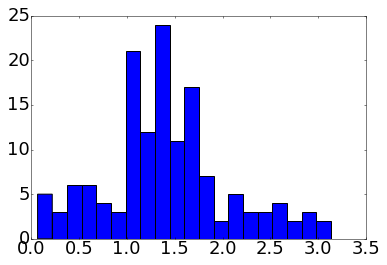

In [303]:
from lab.classes.new_interval import Interval

d_int=Interval.from_mask(d_frames_stat,sampling_interval=1/15.02,data={'expt': expt_grp}) #fix sampling interval
r_int=Interval.from_mask(r_frames_stat,sampling_interval=1/15.02,data={'expt': expt_grp}) #fix sampling interval
plt.hist((d_int.stop-d_int.start)/15,20)

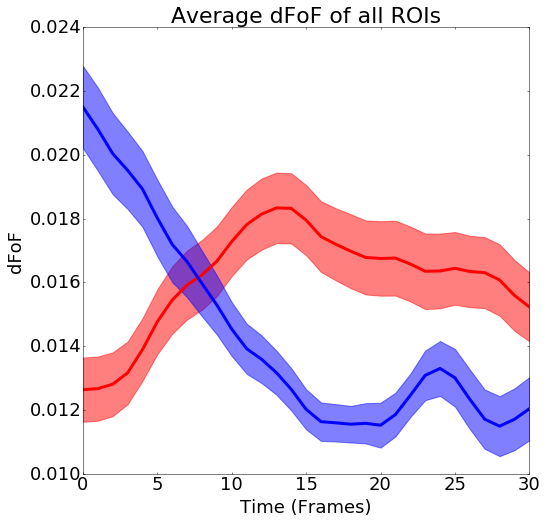

In [304]:

fig, ax = plt.subplots(figsize=(8,8))
df_d=[]
df_r=[]
window=30
for start in d_int.start:
    #if deals with end of array(probably better way)
    if start+window < len(mean_df):
        df_d.append(mean_df[np.arange(start,start+window+1)])

for start in r_int.start:
    if start+window < len(mean_df):
        df_r.append(mean_df[np.arange(start,start+window+1)])        

        
# double check sem calculation
avg_d=np.mean(np.asarray(df_d),axis=0)
error_d=np.std(df_d,axis=0)/np.sqrt(len(df_d))
avg_r=np.mean(np.asarray(df_r),axis=0)
error_r=np.std(df_r,axis=0)/np.sqrt(len(df_d))

#for i in df_d:
#    plt.plot(i)
plt.plot(avg_d,'-r',lw=3)
plt.plot(avg_r,'-b',lw=3)


plt.fill_between(np.arange(0,len(avg_r)),np.squeeze(avg_d-error_d), np.squeeze(avg_d+error_d),
                alpha=0.5,color='r')
plt.fill_between(np.arange(0,len(avg_r)),np.squeeze(avg_r-error_r), np.squeeze(avg_r+error_r),
                alpha=0.5,color='b')   


ax.set_ylabel('dFoF')
ax.set_xlabel('Time (Frames)')
ax.set_title('Average dFoF of all ROIs',size=22)


    
    

In [33]:
trans = expt_grp[0].transientsData(label='soma', roi_filter=None)
trans[3]['durations_sec'][0][3]

0.66559999999999997

# Pearsons Correlation

In [14]:
from lab.analysis import pupil_analysis as pa
from scipy.stats import pearsonr

import itertools
reload(pa)
d,d_frames,d_frames_stat,dp,all_frames=pa.pupil_phase_recruitment(expt_grp,dtype='trans_in_phase',phase='dilation',activity_interval='stationary')
#r,r_frames,r_frames_stat,rp=pa.pupil_phase_recruitment(expt_grp,dtype='trans_in_phase',phase='constriction',activity_interval='stationary')


In [158]:
def prep(arr1, arr2):
    arr1 = arr1.copy()
    arr2 = arr2.copy()

    arr1_nans = np.where(np.isnan(arr1))[0]
    arr2_nans = np.where(np.isnan(arr2))[0]

    arr1[arr2_nans] = np.nan
    arr2[arr1_nans] = np.nan

    return \
        np.nan_to_num(arr1 - np.nanmean(arr1)), \
        np.nan_to_num(arr2 - np.nanmean(arr2))

In [282]:

# no sort, no pupil


data = expt.imagingData(label='soma')

imdata = np.vstack([data])
n_rois = imdata.shape[0]


vals = np.zeros((n_rois, n_rois))


for i, j in itertools.combinations(range(n_rois), 2):

        curve1, curve2 = prep(imdata[i, :], imdata[j, :])

        vals[i, j] = pearsonr(curve1, curve2)[0]
        vals[j, i] = vals[i, j]

for i in xrange(n_rois):
    vals[i, i] = 1.

In [288]:
#sort, pupil
from scipy.stats import pearsonr

import itertools

data = expt.imagingData(label='soma')

# had to reshape all_frames array to stack with data
imdata=np.vstack([np.expand_dims(np.expand_dims(all_frames,0),2),data])
n_rois = imdata.shape[0]


vals = np.zeros((n_rois, n_rois))


for i, j in itertools.combinations(range(n_rois), 2):

        curve1, curve2 = prep(imdata[i, :], imdata[j, :])

        vals[i, j] = pearsonr(curve1, curve2)[0]
        #vals[j, i] = vals[i, j]

for i in xrange(n_rois):
    vals[i, i] = 1.

[]

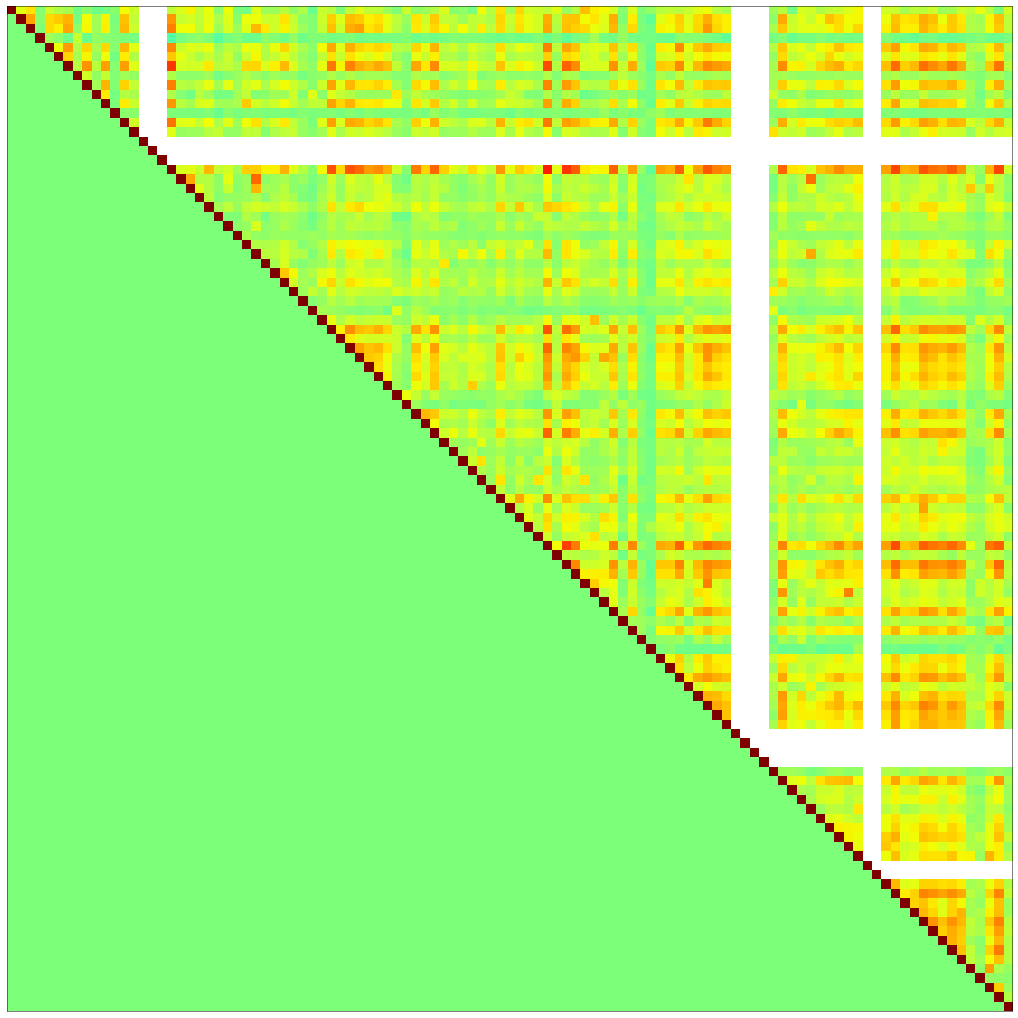

In [289]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
ax.imshow(vals, vmin=-1, vmax=1,interpolation='nearest')

ax.set_xticks([])
ax.set_yticks([])

In [10]:
all_frames

array([ 0.34457944,  0.42420843,  0.38882306, ...,  0.13561373,
        0.1528063 ,  0.12437977])

In [286]:
#mean of pupil
np.nanmean(vals[0,1:])

    

IndentationError: expected an indented block (<ipython-input-286-495a1a9df77a>, line 2)

# pupil and avg CA

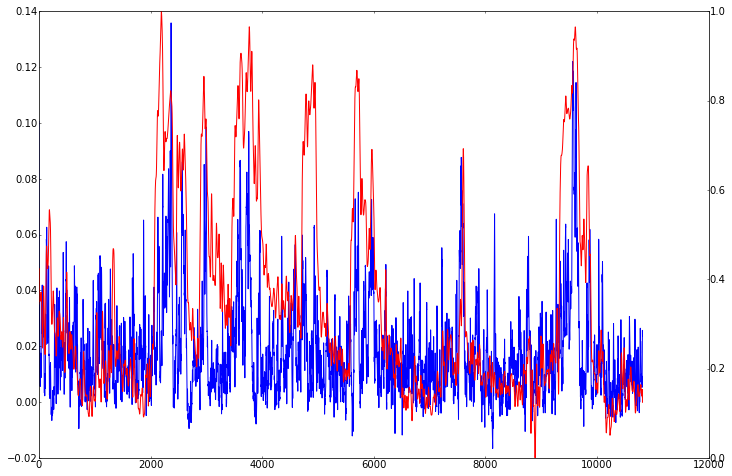

In [11]:
from copy import copy
fig, ax = plt.subplots(figsize=(12,8))
mean_df=np.nanmean(expt_grp[0].imagingData(dFOverF='from_file'),axis=0)
# change to runnin and not running
#d_df=copy(mean_df)
#r_df=copy(mean_df)

ax.plot(mean_df)
#d_df[~d_frames_stat]=np.nan
#r_df[~r_frames_stat]=np.nan
#ax.plot(d_df,'r-')
ax2 = ax.twinx()

ax2.plot(all_frames,'r')




(0.53926206945337896, 0.0)

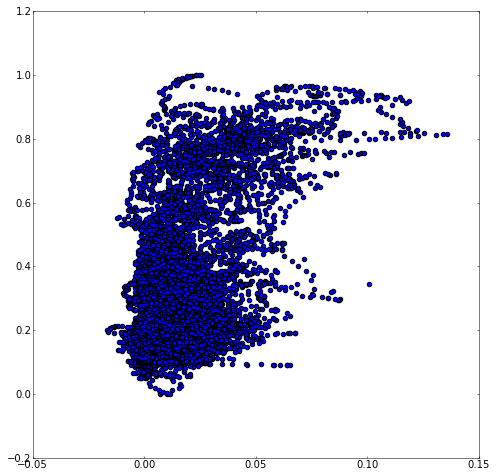

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(mean_df,all_frames)
pearsonr(np.squeeze(mean_df), all_frames)

(array([  540.,  4861.,  3234.,  1226.,   544.,   232.,   110.,    33.,
           30.,     7.]),
 array([-0.01668138, -0.00142589,  0.01382961,  0.0290851 ,  0.04434059,
         0.05959608,  0.07485157,  0.09010707,  0.10536256,  0.12061805,
         0.13587354]),
 <a list of 10 Patch objects>)

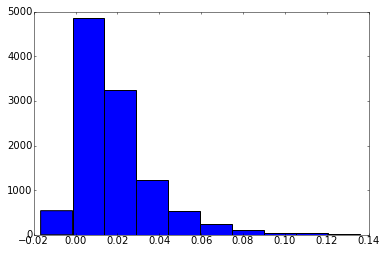

In [24]:
plt.hist(mean_df)